# Agent Testing and Workflow Simulation

This notebook demonstrates how to test individual agents and simulate the multi-agent workflow for the AML Investigation System.

## What this notebook covers:
- Individual agent testing
- Agent tool functionality
- Workflow simulation
- Performance monitoring
- Error handling and debugging


In [20]:
%pip install networkx


Note: you may need to restart the kernel to use updated packages.


In [21]:
# Import necessary libraries
import sys
import os
import asyncio
import json
from datetime import datetime
from typing import Dict, Any, List
import matplotlib.pyplot as plt
import networkx as nx
from IPython.display import display, HTML, Image

# Add the app directory to the path
sys.path.append('../')

from app.core.config_simple import settings
from app.core.logger import get_logger
from app.agents.coordinator import CoordinatorAgent
from app.agents.data_enrichment import DataEnrichmentAgent
from app.agents.pattern_analyst import PatternAnalystAgent
from app.agents.risk_assessor import RiskAssessorAgent
from app.agents.report_synthesizer import ReportSynthesizerAgent
from app.agents.orchestrator import InvestigationOrchestrator
from app.agents.aml_workflow import aml_workflow, build_aml_workflow, run_aml_investigation
from app.models.aml_models import AMLState, TxnEvent, Enrichment, RiskLabel, EscalationDecision, ReportDoc

logger = get_logger(__name__)
print("✅ All imports successful!")
print("📋 Available agents:")
print("  - CoordinatorAgent")
print("  - DataEnrichmentAgent") 
print("  - PatternAnalystAgent")
print("  - RiskAssessorAgent")
print("  - ReportSynthesizerAgent")
print("  - InvestigationOrchestrator")
print("  - LangGraph AML Workflow")


✅ All imports successful!
📋 Available agents:
  - CoordinatorAgent
  - DataEnrichmentAgent
  - PatternAnalystAgent
  - RiskAssessorAgent
  - ReportSynthesizerAgent
  - InvestigationOrchestrator
  - LangGraph AML Workflow


In [22]:
# Sample test data for agent testing
sample_transaction = {
    "transaction_id": "TXN_001",
    "customer_id": "CUST_001",
    "amount": 150000,
    "currency": "USD",
    "transaction_type": "wire",
    "country": "US",
    "counterparty_id": "CP_001",
    "c_txn_7d": 8,
    "timestamp": datetime.utcnow().isoformat()
}

sample_customer = {
    "customer_id": "CUST_001",
    "customer_name": "John Smith",
    "customer_type": "individual",
    "kyc_documents": ["passport.pdf", "bank_statement.pdf"],
    "risk_profile": "medium"
}

sample_alert = {
    "alert_id": "ALT_001",
    "alert_type": "suspicious_activity",
    "severity": "high",
    "description": "Unusual transaction pattern detected"
}

print("📊 Sample test data created:")
print(f"  Transaction: {sample_transaction['transaction_id']} - ${sample_transaction['amount']}")
print(f"  Customer: {sample_customer['customer_name']}")
print(f"  Alert: {sample_alert['alert_type']}")


📊 Sample test data created:
  Transaction: TXN_001 - $150000
  Customer: John Smith
  Alert: suspicious_activity


/var/folders/s0/p9r6d6sx3ld7qlgnsdb_t1pw0000gn/T/ipykernel_58709/3286785073.py:11: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  "timestamp": datetime.utcnow().isoformat()


🕸️ LangGraph Workflow Visualization
📊 Displaying workflow graph as Mermaid diagram...


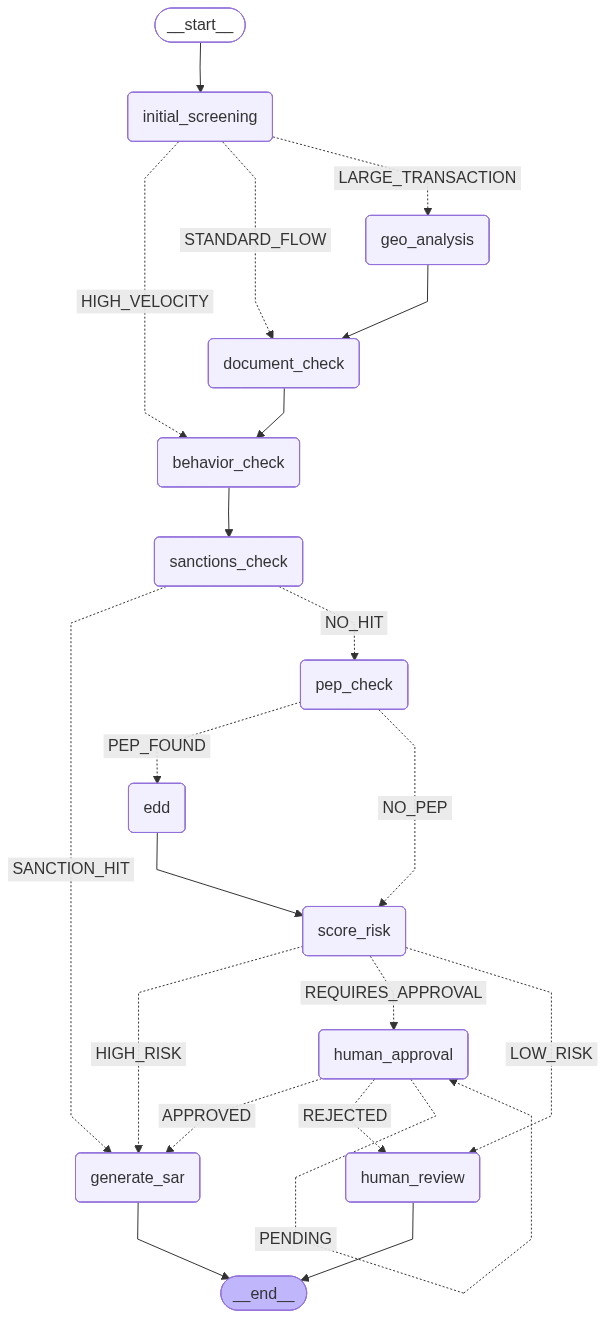


📋 Graph Structure:
   Nodes: 13
   Edges: 20

🔍 Workflow Nodes:
   - __start__
   - initial_screening
   - geo_analysis
   - document_check
   - behavior_check
   - sanctions_check
   - pep_check
   - edd
   - score_risk
   - human_approval
   - generate_sar
   - human_review
   - __end__

🔗 Workflow Edges:
   __start__ → initial_screening
   behavior_check → sanctions_check
   document_check → behavior_check
   edd → score_risk
   geo_analysis → document_check
   human_approval → generate_sar
   human_approval → human_approval
   human_approval → human_review
   initial_screening → behavior_check
   initial_screening → document_check
   initial_screening → geo_analysis
   pep_check → edd
   pep_check → score_risk
   sanctions_check → generate_sar
   sanctions_check → pep_check
   score_risk → generate_sar
   score_risk → human_approval
   score_risk → human_review
   generate_sar → __end__
   human_review → __end__


In [23]:
# Display LangGraph workflow as Mermaid diagram
def display_workflow_graph():
    """Display the LangGraph workflow as a Mermaid diagram"""
    
    print("🕸️ LangGraph Workflow Visualization")
    print("=" * 50)
    
    try:
        # Get the workflow graph
        graph = aml_workflow
        
        # Display as Mermaid diagram
        print("📊 Displaying workflow graph as Mermaid diagram...")
        display(Image(graph.get_graph().draw_mermaid_png()))
        
        # Also show graph structure
        graph_structure = graph.get_graph()
        print(f"\n📋 Graph Structure:")
        print(f"   Nodes: {len(graph_structure.nodes)}")
        print(f"   Edges: {len(graph_structure.edges)}")
        
        # Show nodes
        print(f"\n🔍 Workflow Nodes:")
        for node in graph_structure.nodes:
            print(f"   - {node}")
        
        # Show edges
        print(f"\n🔗 Workflow Edges:")
        for edge in graph_structure.edges:
            print(f"   {edge[0]} → {edge[1]}")
        
        return graph_structure
        
    except Exception as e:
        print(f"❌ Failed to display workflow graph: {str(e)}")
        print("💡 This might be due to missing dependencies or graph structure issues")
        return None

# Display the workflow graph
workflow_graph = display_workflow_graph()
